# Optional Lab - Simple Neural Network
In this lab, we will build a small neural network using Numpy. It will be the same "coffee roasting" network you implemented in Tensorflow.
   <center> <img  src="./images/C2_W1_CoffeeRoasting.png" width="400" />   <center/>


In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/home/vishnu/Documents/meachine-learning/mlcourse(ang)/advancedlearingalgo/Files3/home/jovyan/work/deeplearning.mplstyle')
import tensorflow as tf
from lab_utils_common import dlc, sigmoid
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## DataSet
This is the same data set as the previous lab.

In [29]:
X,Y = load_coffee_data()
print(X)
print(X.shape, Y.shape)

[[185.32  12.69]
 [259.92  11.87]
 [231.01  14.41]
 [175.37  11.72]
 [187.12  14.13]
 [225.91  12.1 ]
 [208.41  14.18]
 [207.08  14.03]
 [280.6   14.23]
 [202.87  12.25]
 [196.7   13.54]
 [270.31  14.6 ]
 [192.95  15.2 ]
 [213.57  14.28]
 [164.47  11.92]
 [177.26  15.04]
 [241.77  14.9 ]
 [237.    13.13]
 [219.74  13.87]
 [266.39  13.25]
 [270.45  13.95]
 [261.96  13.49]
 [243.49  12.86]
 [220.58  12.36]
 [163.59  11.65]
 [244.76  13.33]
 [271.19  14.84]
 [201.99  15.39]
 [229.93  14.56]
 [204.97  12.28]
 [173.19  12.22]
 [231.51  11.95]
 [152.69  14.83]
 [163.42  13.3 ]
 [215.95  13.98]
 [218.04  15.25]
 [251.3   13.8 ]
 [233.33  13.53]
 [280.24  12.41]
 [243.02  13.72]
 [155.67  12.68]
 [275.17  14.64]
 [151.73  12.69]
 [151.32  14.81]
 [164.9   11.73]
 [282.55  13.28]
 [192.98  11.7 ]
 [202.6   12.96]
 [220.67  11.53]
 [169.97  12.34]
 [209.47  12.71]
 [232.8   12.64]
 [272.8   15.35]
 [158.02  12.34]
 [226.01  14.58]
 [158.64  12.24]
 [211.66  14.17]
 [271.95  14.97]
 [257.16  11.7

Let's plot the coffee roasting data below. The two features are Temperature in Celsius and Duration in minutes. [Coffee Roasting at Home](https://www.merchantsofgreencoffee.com/how-to-roast-green-coffee-in-your-oven/) suggests that the duration is best kept between 12 and 15 minutes while the temp should be between 175 and 260 degrees Celsius. Of course, as the temperature rises, the duration should shrink. 

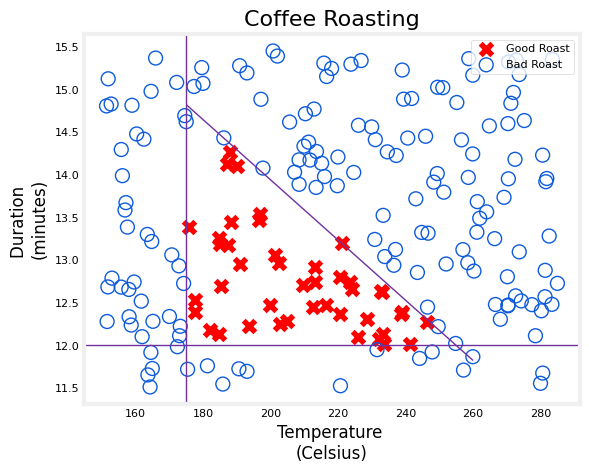

In [30]:
plt_roast(X,Y)

### Normalize Data
To match the previous lab, we'll normalize the data. Refer to that lab for more details

In [31]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51


Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


## Numpy Model (Forward Prop in NumPy)
<center> <img  src="./images/C2_W1_RoastingNetwork.PNG" width="200" />   <center/>  
Let's build the "Coffee Roasting Network" described in lecture. There are two layers with sigmoid activations.

As described in lecture, it is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. 

<img src="images/C2_W1_dense3.png" width="600" height="450">

In the first optional lab, you constructed a neuron in NumPy and in Tensorflow and noted their similarity. A layer simply contains multiple neurons/units. As described in lecture, one can utilize a for loop to visit each unit (`j`) in the layer and perform the dot product of the weights for that unit (`W[:,j]`) and sum the bias for the unit (`b[j]`) to form `z`. An activation function `g(z)` can then be applied to that result. Let's try that below to build a "dense layer" subroutine.

First, you will define the activation function `g()`. You will use the `sigmoid()` function which is already implemented for you in the `lab_utils_common.py` file outside this notebook.

In [32]:
# Define the activation function
g = sigmoid

Next, you will define the `my_dense()` function which computes the activations of a dense layer.

In [33]:
def my_dense(a_in, W, b):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
    Returns
      a_out (ndarray (j,))  : j units|
    """
    units = W.shape[1]
    print(f"units: {units}")
    a_out = np.zeros(units)
    for j in range(units):               
        w = W[:,j]    
        print(f"{w} weights")                                
        z = np.dot(w, a_in) + b[j]       
        print(z)  
        a_out[j] = g(z)     
        print(f"{a_out[j]} sigmoid output")          
    return(a_out)

*Note: You can also implement the function above to accept `g` as an additional parameter (e.g. `my_dense(a_in, W, b, g)`). In this notebook though, you will only use one type of activation function (i.e. sigmoid) so it's okay to make it constant and define it outside the function. That's what you did in the code above and it makes the function calls in the next code cells simpler. Just keep in mind that passing it as a parameter is also an acceptable implementation. You will see that in this week's assignment.*

The following cell builds a two-layer neural network utilizing the `my_dense` subroutine above.

In [34]:
def my_sequential(x, W1, b1, W2, b2):
    a1 = my_dense(x,  W1, b1)
    a2 = my_dense(a1, W2, b2)
    return(a2)

We can copy trained weights and biases from the previous lab in Tensorflow.

In [35]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

### Predictions
<img align="left" src="./images/C2_W1_RoastingDecision.PNG"     style=" width:380px; padding: 10px 20px; " >

Once you have a trained model, you can then use it to make predictions. Recall that the output of our model is a probability. In this case, the probability of a good roast. To make a decision, one must apply the probability to a threshold. In this case, we will use 0.5

Let's start by writing a routine similar to Tensorflow's `model.predict()`. This will take a matrix $X$ with all $m$ examples in the rows and make a prediction by running the model.

In [36]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = my_sequential(X[i], W1, b1, W2, b2)
        print(p[i,0])
    return(p)

We can try this routine on two examples:

In [37]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

units: 3
[-8.93 -0.1 ] weights
-5.689995021820069
0.003368226502365891 sigmoid output
[ 0.29 -7.32] weights
-12.459897864460945
3.87912190304389e-06 sigmoid output
[12.9  10.81] weights
-0.5702216997742653
0.3611856703591624 sigmoid output
units: 1
[-31.18 -27.59 -32.56] weights
3.544666245788598
0.9719322875321041 sigmoid output
0.9719322875321041
units: 3
[-8.93 -0.1 ] weights
-5.964716170430184
0.002561196741317444 sigmoid output
[ 0.29 -7.32] weights
-32.569485942721364
7.165590355183881e-15 sigmoid output
[12.9  10.81] weights
29.12713446497917
0.999999999999776 sigmoid output
units: 1
[-31.18 -27.59 -32.56] weights
-17.22985811438718
3.2897862618613913e-08 sigmoid output
3.2897862618613913e-08


To convert the probabilities to a decision, we apply a threshold:

In [42]:
yhat = np.zeros_like(predictions)
print(yhat)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

[[0.]
 [0.]]
decisions = 
[[1.]
 [0.]]


This can be accomplished more succinctly:

In [43]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


## Network function

This graph shows the operation of the whole network and is identical to the Tensorflow result from the previous lab.
The left graph is the raw output of the final layer represented by the blue shading. This is overlaid on the training data represented by the X's and O's.   
The right graph is the output of the network after a decision threshold. The X's and O's here correspond to decisions made by the network.  

units: 3
[-8.93 -0.1 ] weights
5.695902047157286
0.996651544623629 sigmoid output
[ 0.29 -7.32] weights
2.7459628534317044
0.9396849416071816 sigmoid output
[12.9  10.81] weights
-39.70218714237213
5.7221495572549115e-18 sigmoid output
units: 1
[-31.18 -27.59 -32.56] weights
-41.59150270030689
8.650473562715672e-19 sigmoid output
8.650473562715672e-19
units: 3
[-8.93 -0.1 ] weights
4.922373976707457
0.9927708181934712 sigmoid output
[ 0.29 -7.32] weights
2.771083025932313
0.9410930548435664 sigmoid output
[12.9  10.81] weights
-38.584772572517394
1.7492270565283115e-17 sigmoid output
units: 1
[-31.18 -27.59 -32.56] weights
-41.50935149440643
9.391126672841227e-19 sigmoid output
9.391126672841227e-19
units: 3
[-8.93 -0.1 ] weights
4.148841648101806
0.9844625351501546 sigmoid output
[ 0.29 -7.32] weights
2.796203336715701
0.94247031442347 sigmoid output
[12.9  10.81] weights
-37.46735185146331
5.347315875167872e-17 sigmoid output
units: 1
[-31.18 -27.59 -32.56] weights
-41.28829782092535

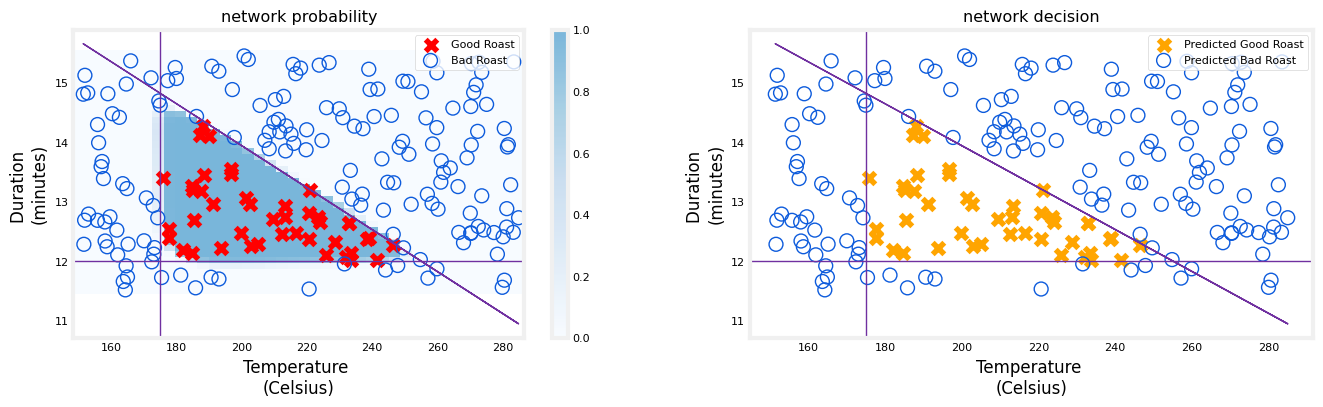

In [44]:
netf= lambda x : my_predict(norm_l(x),W1_tmp, b1_tmp, W2_tmp, b2_tmp)
plt_network(X,Y,netf)

## Congratulations!
You have built a small neural network in NumPy. 
Hopefully this lab revealed the fairly simple and familiar functions which make up a layer in a neural network. 